In [1]:
using DIVAnd
using Dates
using Statistics
using CairoMakie
using GeoMakie
using NCDatasets

In [2]:
include("config_MASK.jl")

"https://dox.uliege.be/index.php/s/h8d3pyqmuea6J9H/download"

In [3]:
fichiers = readdir()
println(fichiers)

[".ipynb_checkpoints", "DL_Dataset_Mask_Application.ipynb", "GeoMakie train.ipynb", "Mask_Training.ipynb", "Oussema_CHLA_DIVAnd3D.ipynb", "all.nc", "cmems_obs-oc_med_bgc-plankton_nrt_l3-multi-1km_P1D_1732114028831.nc", "config_MASK.jl", "dataOussema.nc", "first_figure.png"]


In [4]:
ds = Dataset("cmems_obs-oc_med_bgc-plankton_nrt_l3-multi-1km_P1D_1732114028831.nc")

NCDataset: cmems_obs-oc_med_bgc-plankton_nrt_l3-multi-1km_P1D_1732114028831.nc
Group: /

Dimensions
   time = 1
   latitude = 1580
   longitude = 3308

Variables
  time   (1)
    Datatype:    Float64
    Dimensions:  time
    Attributes:
     standard_name        = time
     long_name            = Time
     units                = seconds since 1970-01-01 00:00:00
     calendar             = gregorian
     axis                 = T

  latitude   (1580)
    Datatype:    Float32
    Dimensions:  latitude
    Attributes:
     standard_name        = latitude
     long_name            = Latitude
     units                = degrees_north
     unit_long            = Degrees North
     axis                 = Y
     valid_min            = 30.005064
     valid_max            = 45.994938

  longitude   (3308)
    Datatype:    Float32
    Dimensions:  longitude
    Attributes:
     standard_name        = longitude
     long_name            = Longitude
     units                = degrees_east
     un

In [5]:
chl_a = ds["CHL"];
lon = ds["longitude"];
lat = ds["latitude"];
diato = ds["DIATO"];



In [6]:
println(size(lon))
println(size(lat))
println(size(chl_a))
println(size(diato))

(3308,)
(1580,)
(3308, 1580, 1)
(3308, 1580, 1)


In [7]:
println(extrema(lon))
println(extrema(lat))

(-5.993576f0, 36.493576f0)
(30.005064f0, 45.994938f0)


### Chargement du Mask

In [8]:
# define the resolution

dx = dy = 0.005
lonr = -6.:dx:36.5
latr = 30.:dy:46.
depthr = [0];

In [9]:
# Put the file into bathname var

bathname = gebco08file

"../data\\gebco_30sec_8.nc"

In [10]:
# Download check

download_check(gebco08file, gebco08fileURL) # from config_MASK.jl
bathisglobal = true;

[ Info: File already downloaded


In [11]:
# Load Mask form the resolution and bathname

xmask,ymask,mmask = load_mask(bathname,true,lonr,latr,depthr);

In [12]:
# Checking sizes

@show size(mmask);
@show size(xmask);
@show size(ymask);

size(mmask) = (8501, 3201, 1)
size(xmask) = (8501,)
size(ymask) = (3201,)


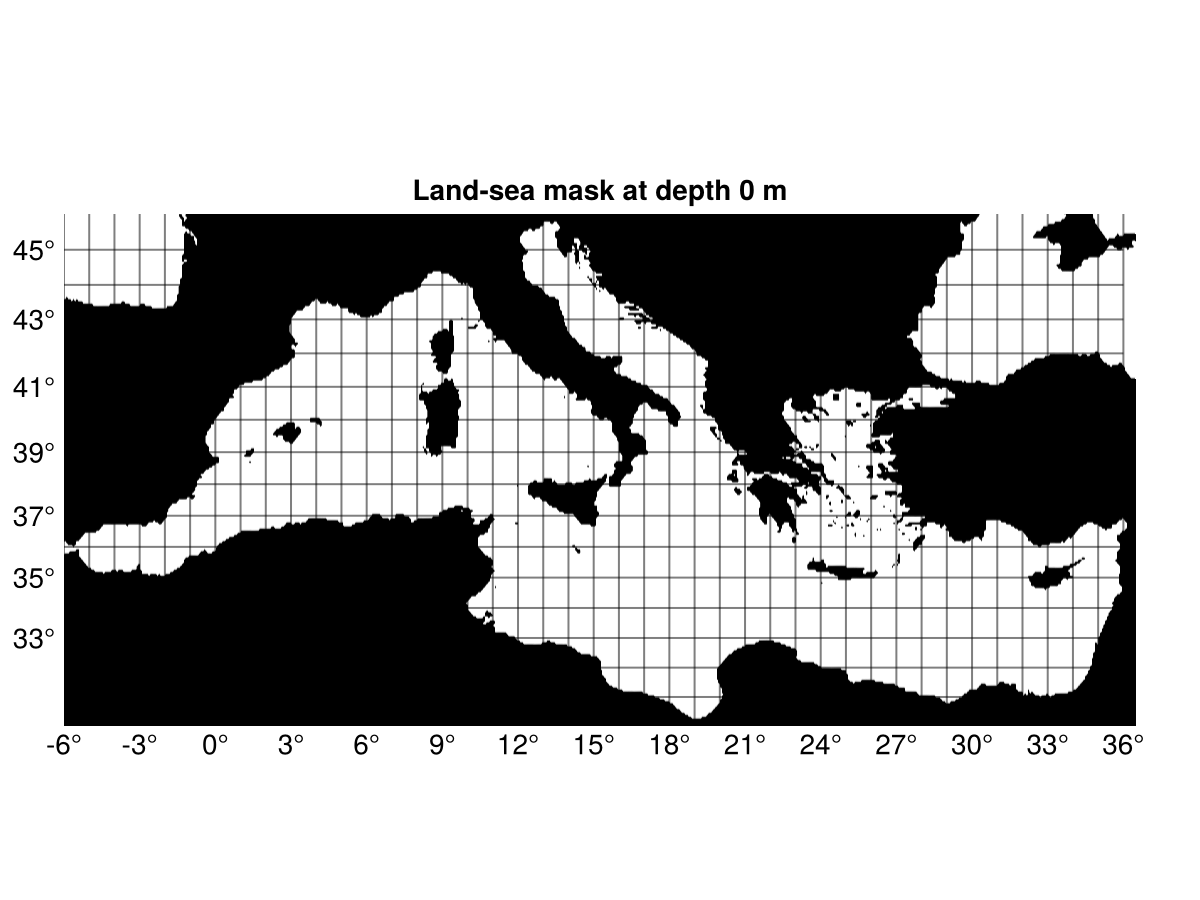

In [13]:
# Plot of the mask, taking first depth (no other in this dataset)

NN = 1
plot_mask(xmask,ymask,mmask[:,:,NN], depth=depthr[NN])

### Pre-visualisation of the dataset

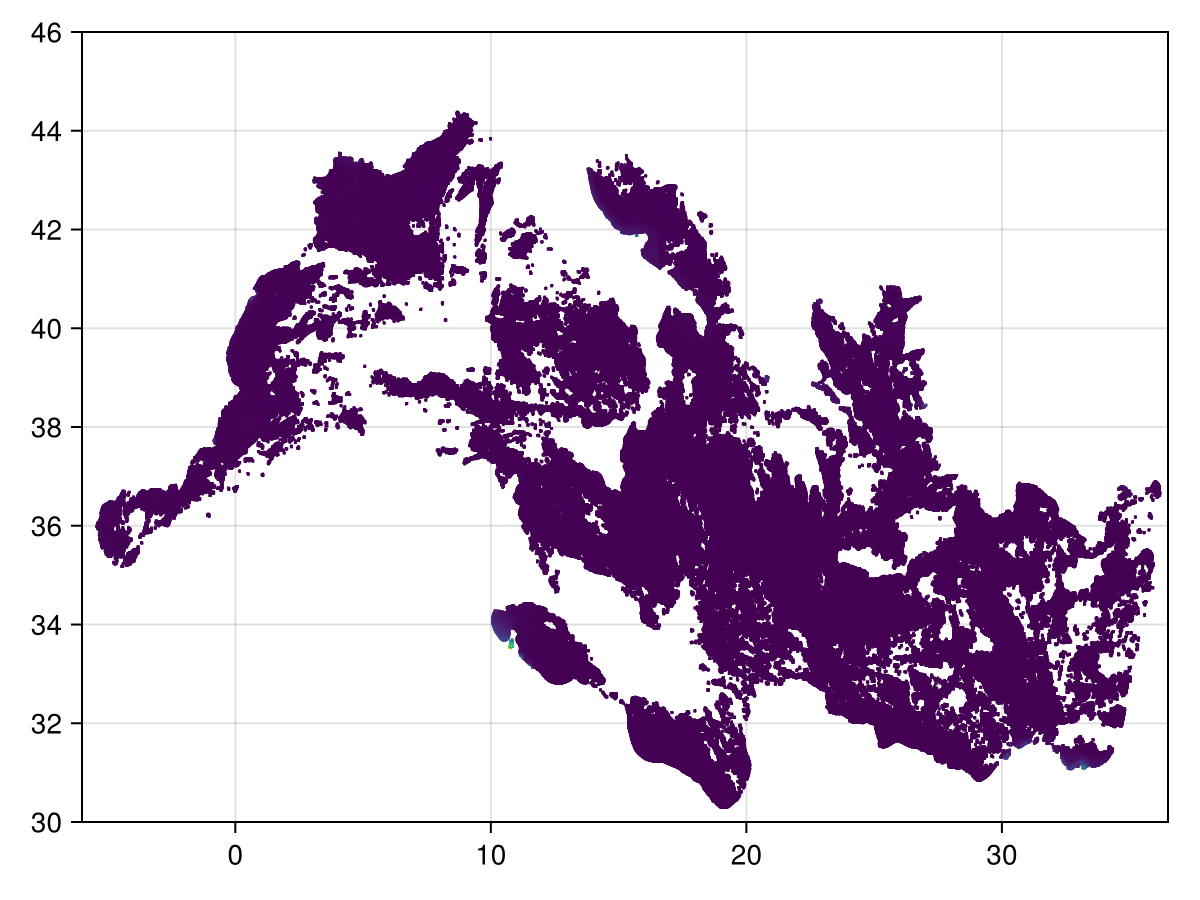

In [14]:
heatmap(lon,lat,chl_a[:,:,1])

### Plot of the dataset

In [15]:
# We remove values == 1 from the mask

chl_a_masked = copy(mmask[:,:,1])

8501×3201 BitMatrix:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     

In [16]:
# Create a new matrix for the plotted mask, initialized only with missings

chl_a_missing = Union{Missing, Float64}[missing for _ in 1:size(chl_a_masked,1), _ in 1:size(chl_a_masked,2)];

In [17]:
# We put missing at every ocean pixel

for i in 1:size(chl_a_masked,1)
    for j in 1:size(chl_a_masked,2) 
        if chl_a_masked[i,j] == 1
            chl_a_missing[i,j] = missing
        else
            chl_a_missing[i,j] = chl_a_masked[i,j]
        end
    end
end

In [18]:
# Final matrix combined of 0 & missings

chl_a_missing

8501×3201 Matrix{Union{Missing, Float64}}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  missing  missing  missing  missing
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     missing  missing  missing  missing
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     missing  missing  missing  missing
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     missing  missing  missing  missing
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     missing  missing  missing  missing
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  missing  missing  missing  missing
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     missing  missing  missing  missing
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     missing  missing  missing  missing
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     missing  missing  missing  missing
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     missing  missing  missing  missing
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  missing  missing  missing  missing
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     missing  missing  missing  missing
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     missing  missing  missing  mis

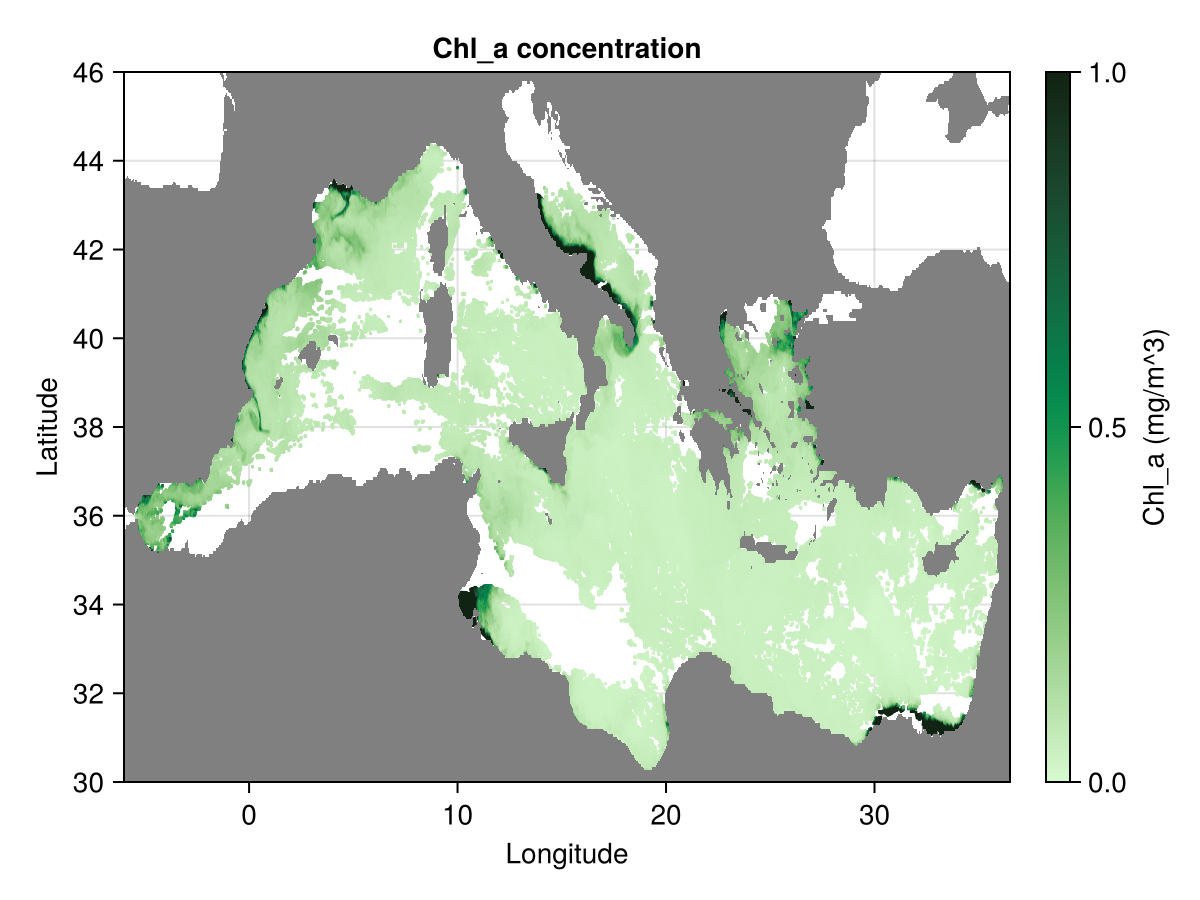

In [19]:
# figure of the mask

fig = Figure()
ax = Axis(fig[1,1], title = "Chl_a concentration", xlabel = "Longitude", ylabel = "Latitude")
hm = heatmap!(ax, lon, lat, chl_a[:,:,1], colormap=:algae, colorrange=(0,1))

heatmap!(ax,lon,lat,chl_a_missing, colormap=:grays)

cb = Colorbar(fig[1,2], hm, label="Chl_a (mg/m^3)")

fig

### DIVAnd pre-processing of variables

In [20]:
mask,(pm,pn),(xi,yi) = DIVAnd.domain(bathname,bathisglobal,lonr,latr);

In [21]:
lon_vec = repeat(lon, inner=length(lat));
lat_vec = repeat(lat, outer=length(lon));
chl_a_vec = vec(chl_a);

### Remove missings

In [22]:
sum(ismissing.(chl_a_vec))

4206175

In [23]:
length(chl_a_vec)

5226640

In [24]:
chl_a_vec_clean = filter(!ismissing,chl_a_vec);
lon_vec_clean = filter(!ismissing,chl_a_vec);
lat_vec_clean = filter(!ismissing,chl_a_vec);

In [25]:
lon_vec_clean = Float64.(lon_vec_clean);
lat_vec_clean = Float64.(lat_vec_clean);
chl_a_vec_clean = Float64.(chl_a_vec_clean);

### Definition of parameters

In [28]:
len = Float64(1000)

1000.0

In [29]:
epsilon2 = Float64(0.5)

0.5

## DIVAndrun()

In [30]:
fi,s = DIVAndrun(mask,(pm,pn),(xi,yi),(lon_vec_clean,lat_vec_clean),chl_a_vec_clean,len,epsilon2);

In [31]:
size(fi)

(8501, 3201)

In [32]:
size(xi)

(8501, 3201)

In [33]:
size(yi)

(8501, 3201)

In [46]:
xi[:,1];
yi[1,:];

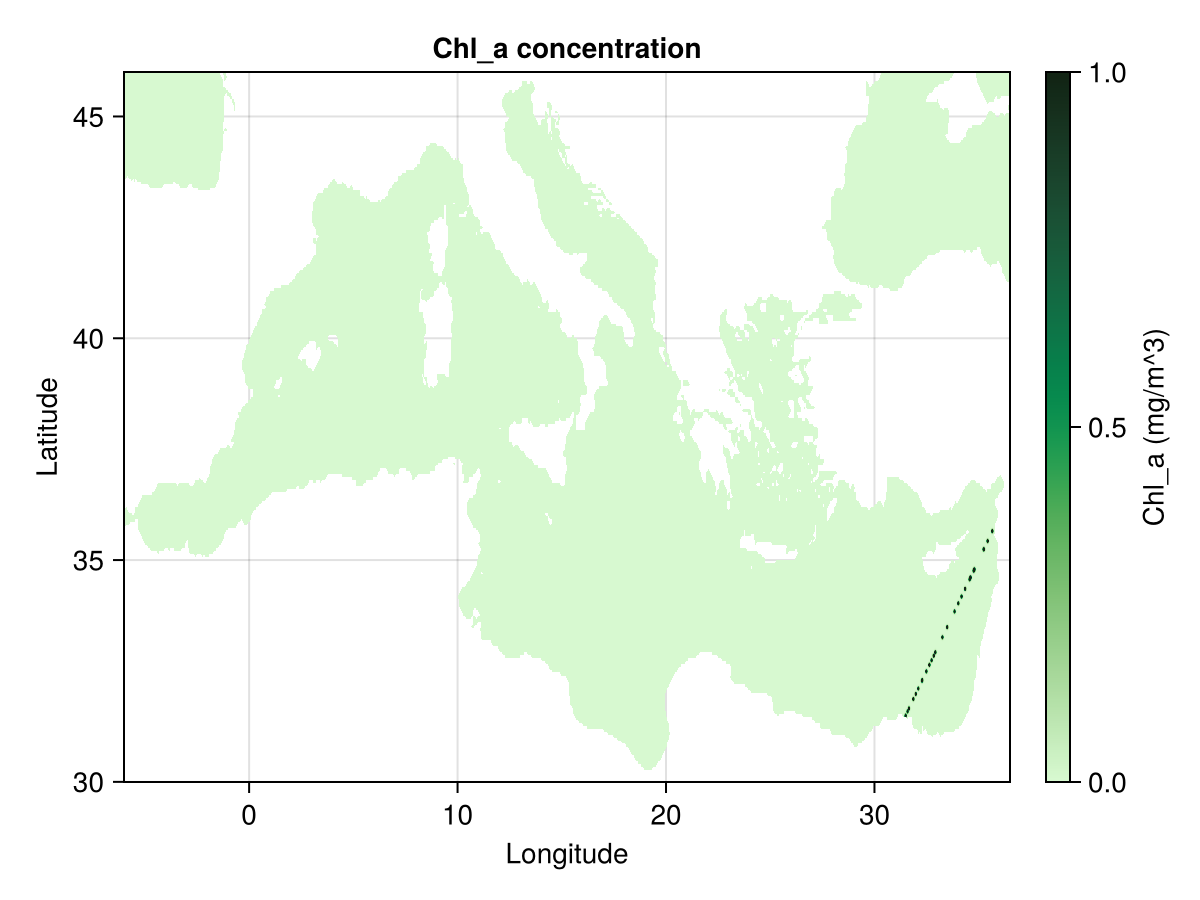

In [51]:
# figure of the mask

fig = Figure()
ax = Axis(fig[1,1], title = "Chl_a concentration", xlabel = "Longitude", ylabel = "Latitude")
hm = heatmap!(ax, xi[:,1], yi[1,:], fi[:,:], colormap=:algae, colorrange=(0,1))

cb = Colorbar(fig[1,2], hm, label="Chl_a (mg/m^3)")

fig